# Unit 3: Introduction to Data Visualization
--------------------------------------------

Observing data graphically can help you to quickly spot patterns that would be more difficult to discern from the numbers alone. When well executed, visualizations can also be a powerful aid in communicating results to others. 

To illustrate the importance of data visualization, take a look at the output of the example below (don't worry about the code for now). Is the pattern in the data more apparent in the numerical table, or in the scatter plot?

array([[0.01145953, 2.02291906],
       [0.20190577, 2.40381153],
       [0.48508004, 2.97016008],
       [0.80800822, 3.61601645],
       [0.39708786, 2.79417572],
       [0.04418186, 2.08836373],
       [0.46577136, 2.93154272],
       [0.3032646 , 2.6065292 ],
       [0.16671746, 2.33343493],
       [0.93084459, 3.86168917]])

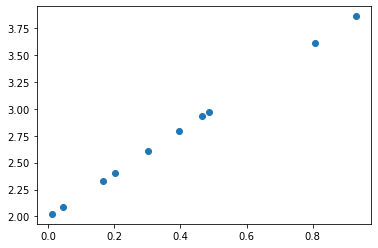

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create 10 (x, y) data points 
x = np.random.random(10)
y = 2*x + 2

# plot the points
fig, ax = plt.subplots()
ax.scatter(x, y)

# print the (x, y) data
# vstack combines (stacks) the x and y arrays into a 2d matrix
# the .T is the matrix transpose, so that the x and y become columns
np.vstack([x, y]).T

Obviously, we can more easily see the linear trend (which we created with a random set of x values, and the function $f(x)=2x+2$) in the plot.

Data visualization is an art and a science. Beyond what we might consider to be the aesthetic aspects of a graph, there are real ways in which humans interpret visuals that play a role in how the image is perceived. We are much better at comparing lengths of objects, for example, than we are at comparing angles or areas. This is one reason that a bar graph is typically a better choice than the much-maligned pie chart. We'll focus in this section on the mechanics of creating charts, but it is important to also think about the design aspects. I recommend picking up a copy of Cole Nussbaumer Knaflic's [Storytelling with Data](https://storytellingwithdata.com).

A few tips that will improve your data visualization (regardless of the tool you use):

1. Consider the message that you are trying to deliver, and the level of understanding in your audience. If your audience is highly technical, a high level of detail may be appropriate and technical jargon may be easily understood. When conveying information to a less technical audience, you may need to streamline the message to avoid confusion.
2. Sketch out (prototype) your plot before starting to build the plot on the computer. Conceptualizing a design can sometimes be more challenging than writing the code.
3. Try to remove or minimize any elements that distract from the data.
3. Seek out candid and constructive feedback on your designs.
4. Think critically about other data visualizations that you observe in literature or presentations. You don't need to share your unsolicited feedback, but mindfully observe what works and what doesn't. Use this to improve your visualizations. If you need some [sometimes amusing] examples of what not to do, check out [WTF Visualizations](https://vis.wtf).

Why create a plot using Python code, when it's so easy to do in a spreadsheet? Customization and automation! By writing code that creates the plot, I find it easier to customize the look and match styles between graphics that I am using in a presentation or report. Additionally, you can use the `numpy` and `pandas` data structures that we've already introduced to populate the data in a plot. Then, if the data changes, or you need to duplicate the plot with a new dataset, you can just re-run the code and have a matching image.

**After completing this unit, you should be able to:**

- Understand basic design principles for data visualization, and where to learn more (because we cannot show every aspect of `matplotlib` here!)
- Create basic plots using numerical data (line, scatter, bar) using a numpy or pandas dataset
- Customize plot elements including axis labels, tick marks, legend, color scheme
- Save the finished plot to a file

## 3.1. Creating a line plot in `matplotlib`

As in our previous section, we will be importing several Python packages for our plotting work. We can build on our knowledge of `numpy` and `pandas` to manage the data, and then add `matplotlib` for the plotting functionality. Specifically, we'll demonstrate the use of the `matplotlib.pyplot` sub-package, which is typically imported as:

```
import matplotlib.pyplot as plt
```

We'll begin with a line plot. This style is typically used to visualize series of connected points, such as a time series or the result of evaluating a function.

### 3.1.1. The plotting the $sin(x)$ function

Recall our use of the `numpy` functions to create 100 evenly-spaced values for the $x$ axis on the interval $[0,4\pi]$ and then calculate and plot the $\sin x$ function. 

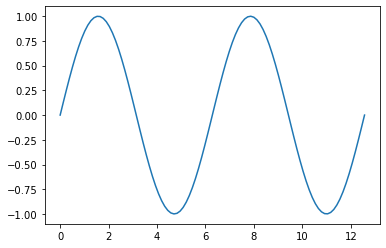

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# create an array of 100 x values on the interval [0, 4pi]
x_arr = np.linspace(0, 4*np.pi, 100)
y_sin = np.sin(x_arr)

# create the blank figure and axis for the plot 
fig, ax = plt.subplots()

# plot the x, y values as a line plot on the blank axis
ax.plot(x_arr, y_sin)

We start the plot by calling the `plt.subplots()` function from the `matplotlib.pyplot` package. If we do not pass any arguments to the functions, This creates a `figure`, which we have stored in a variable named `fig`, and a single `axis`, which we store in a variable named `ax`. You may find examples on the internet where this line is omitted, and the `matplotlib.pyplot` package creates the `figure` and `axis` automatically. However, I think it's a good habit to create this explicitly to generate references to the `figure` and `axis` objects. This is necessary when we make more complicated plots (such as multiple faceted plots) so, if we get in the habit now, we won't need to learn a new approach. 

The `axis.plot()` function takes has 2 positional parameters for $x$ and $y$ arrays. There are several additional attributes that can be set within this function. To add additional parameters, enter `<parameter name>=<attribute value>` in the `plot()` function. Each additional parameter will be separated with a comma.

| Attribute | Description | Example Values |
|-----------|-------------|----------------|
| `ls` | line style | `':'`, `'--'`, `'-'` |
| `lw` | line width | real number |
| `c` | color | named color: `'red'`, `'blue'`, ... or RGB hex code |
| `marker` | data point marker | `'o'`, `'.'`, `'d'`, `'^'`, ... |
| `ms` | marker size | real number | 

Modify the `axis.plot()` function below to experiment with different parameters and adjust the format of the plot.

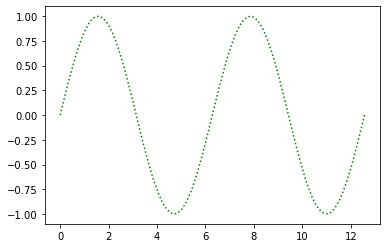

In [4]:
# create the blank figure and axis for the plot 
fig, ax = plt.subplots()

# use optional parameters of ls and c to modify the line properties
ax.plot(x_arr, y_sin, ls=':', c='green')

When plotting in a Jupyter Notebook, we start with an empty plot in each new cell. To plot multiple lines in the same plot, you will call the plot function multiple times within the cell.

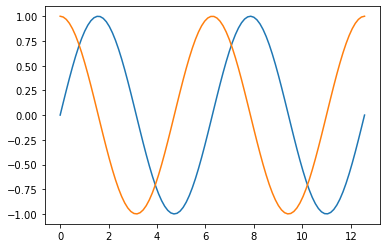

In [5]:
# calculate the cosine function for every x value in our array
y_cos = np.cos(x_arr)

# create the blank figure and axis for the plot 
fig, ax = plt.subplots()

# plot the sine array on the axis
ax.plot(x_arr, y_sin)

# plot the cosine array on the axis
ax.plot(x_arr, y_cos)

### 3.1.2. Adding a legend and axis labels

Notice two things in the plot above. First, `matplotlib` is automatically making these two lines different colors, through the use of a color `cycler`. Second, as we add additional data to the plot, it may be important for us to add a legend. 

Our Python code doesn't know what this data array represents, unless we tell it. To provide a description of the line, we add the `label` attribute to our plot command, and enter our chosen description in quotes. Then, we need to call the `axis.legend()` function to instruct `matplotlib` to display the legend on this plot. If you remember back to our discussion of LaTeX formatting in Unit 1, we can format legend items in `matplotlib` as math equations by enclosing them in dollar signs (`$`).

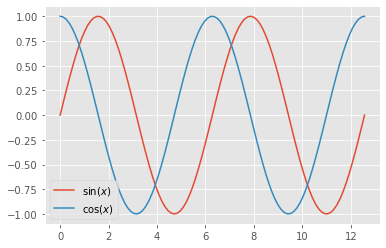

In [22]:
# create the blank figure and axis for the plot 
fig, ax = plt.subplots()

# plot the sine and cosine, adding text axis labels
ax.plot(x_arr, y_sin, label='$\sin (x)$')
ax.plot(x_arr, y_cos, label='$\cos (x)$')

# create the legend, using the labels defined in the plot() function
ax.legend()

Now, we may want to add axis labels, and a title, to our plot. Similar to calling the `axis.legend()` function above, the `axis` object has functions available to add and modify these other plot elements. In general, these functions look like `axis.set_<element name>()`. In the example below, we set the labels for the $x$ and $y$ axes, along with the title for the axes.

Text(0.5, 1.0, 'Introduction to plotting with matplotlib')

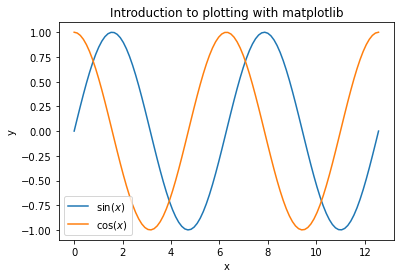

In [7]:
fig, ax = plt.subplots()
ax.plot(x_arr, y_sin, label='$\sin (x)$')
ax.plot(x_arr, y_cos, label='$\cos (x)$')

# create the legend, using the labels defined in the plot() function
ax.legend()

# add axis labels by providing a text string as the first argument
ax.set_xlabel('x')
ax.set_ylabel('y')

# add a title by providing a text string as the first argument
ax.set_title('Introduction to plotting with matplotlib')

When we called the `set_<element name>` functions in the example above, we used the default color (black) and sizing for the elements. The only argument provided to these functions was the text label. We may want to further customize these elements. This can be helpful if, for instance, you need to modify font sizes to make labels easier to read.

In the example below, some different examples are provided using the optional `c` (color) and `fontsize` parameters.  Just remember, take care to not add distraction or clutter by making each plot element different. 

`fontsize` options: [`xx-small`, `x-small`, `small`, `medium`, `large`, `x-large`, `xx-large`]

Feel free to modify and execute this cell to experiment with different selections.

Text(0.5, 1.0, 'Introduction to plotting with matplotlib')

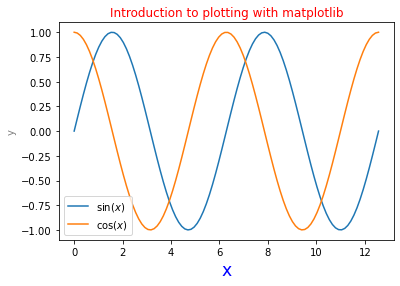

In [8]:
fig, ax = plt.subplots()
ax.plot(x_arr, y_sin, label='$\sin (x)$')
ax.plot(x_arr, y_cos, label='$\cos (x)$')

# create the legend, using the labels defined in the plot() function
ax.legend()

# add axis labels by providing a text string as the first argument
ax.set_xlabel('x', c='blue', fontsize='xx-large')
ax.set_ylabel('y', c='gray', fontsize='medium')

# add a title by providing a text string as the first argument
ax.set_title('Introduction to plotting with matplotlib', c='red', fontsize='large')

### 3.1.3. Modifying the axes ticks and limits

Continuing on our mission to customize the plot design, we now turn to the axis ticks and tick labels which communicate the scale for the plot. When we use the `axis.set_xticks()` or `axis.set_yticks()` functions, we provide a `list` or `ndarray` of values which will be used in place of the default labels. 

For the $x$-axis for this trig function, we might choose to set the axis ticks in terms of multiples of $\pi$. This can be done a few different ways using either `numpy` or a list comprehension. We'll demonstrate the use of the `np.linspace()` function.

As another option, for the $y$-axis, we use a manually-generated list to provide the desired options. 

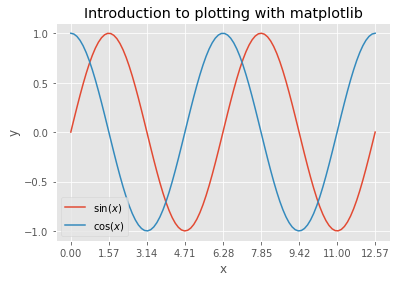

In [23]:
fig, ax = plt.subplots()

ax.plot(x_arr, y_sin, label='$\sin (x)$')
ax.plot(x_arr, y_cos, label='$\cos (x)$')

# create the legend, using the labels defined in the plot() function
ax.legend()

# add axis labels by providing a text string as the first argument
ax.set_xlabel('x')
ax.set_ylabel('y')

# add a title by providing a text string as the first argument
ax.set_title('Introduction to plotting with matplotlib')

# modify tick positions
ax.set_xticks(np.linspace(0, 4*np.pi, 9))
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

If you know that your data will *always* fall within a well-defined range, manually coding these lists can be ok. But, this can become difficult to manage. It can be preferable to write code to space out the labels. For instance, if you definitely want the spacing in between $y$ ticks to be 0.25, you can use the `ndarray.min()`/`ndarray.max()` functions, together with an `np.arange()` to generate the appropriate labels.

Here, I use all caps as a style to indicate that `ytick_spacing` is a constant that can be tweaked to modify how the code behaves. When we create the `np.arange()`, recall that the stop value is not included in the resulting array so we need to add one extra `ytick_spacing` to the maximum value of the array.

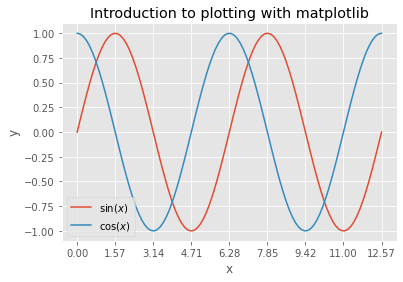

In [24]:
ytick_spacing = 0.25

fig, ax = plt.subplots()

ax.plot(x_arr, y_sin, label='$\sin (x)$')
ax.plot(x_arr, y_cos, label='$\cos (x)$')

# create the legend, using the labels defined in the plot() function
ax.legend()

# add axis labels by providing a text string as the first argument
ax.set_xlabel('x')
ax.set_ylabel('y')

# add a title by providing a text string as the first argument
ax.set_title('Introduction to plotting with matplotlib')

# modify tick positions
yticks = np.arange(y_sin.min(), y_sin.max() + ytick_spacing, ytick_spacing)

ax.set_xticks(np.linspace(0, 4*np.pi, 9))
ax.set_yticks(yticks)

Looking at the $x$ ticks in decimal form isn't the most attractive representation, and probably makes it less clear that we have set ticks as fractions of $\pi$. We can further improve upon this by separately setting both the *xticks* (the position) and *xticklabels* (the text). The tick values are identical to the example above. But, here we use a list comprehension and an *f-string* to format the value as a multiple of $\pi$. Inside of the *f-string*, you can see that we use the LaTeX code `$\pi$` to print the Greek letter *pi*. The other Greek characters are available in LaTeX by using their name after the backslash. Also, you can capitalize the first letter of the  character name to get an upper-case Greek letter. 

[Text(0.0, 0, '0.0$\\pi$'),
 Text(1.5707963267948966, 0, '0.5$\\pi$'),
 Text(3.141592653589793, 0, '1.0$\\pi$'),
 Text(4.71238898038469, 0, '1.5$\\pi$'),
 Text(6.283185307179586, 0, '2.0$\\pi$'),
 Text(7.853981633974483, 0, '2.5$\\pi$'),
 Text(9.42477796076938, 0, '3.0$\\pi$'),
 Text(10.995574287564276, 0, '3.5$\\pi$'),
 Text(12.566370614359172, 0, '4.0$\\pi$')]

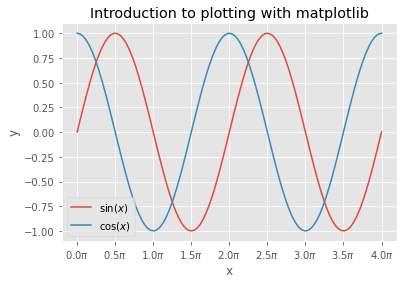

In [25]:
fig, ax = plt.subplots()
ax.plot(x_arr, y_sin, label='$\sin (x)$')
ax.plot(x_arr, y_cos, label='$\cos (x)$')

# create the legend, using the labels defined in the plot() function
ax.legend()

# add axis labels by providing a text string as the first argument
ax.set_xlabel('x')
ax.set_ylabel('y')

# add a title by providing a text string as the first argument
ax.set_title('Introduction to plotting with matplotlib')

# modify tick positions
x_ticks = np.linspace(0, 4*np.pi, 9)
x_ticklabels = [f'{x}$\pi$' for x in x_ticks/np.pi]

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

One additional feature that we'll introduce on this line plot is the straight horizontal or vertical line. This can be helpful for visualizing a threshold value that must be met. 

Below, we have added a horizontal line at $y=0$ using the `axis.axhline()` function. For a horizontal line, the constant $y$ value is provided as the first argument. There is a companion function, `axis.axvline()`, for vertical lines that you can experiment with in the code block below. The same optional parameters that we used for customizing our `axis.plot()` will also apply to these constant lines. Here, we introduce a new parameter, `alpha`, that is used to set the percent opacity of the line from 0 (fully-transparent) to 1 (fully-opaque).   

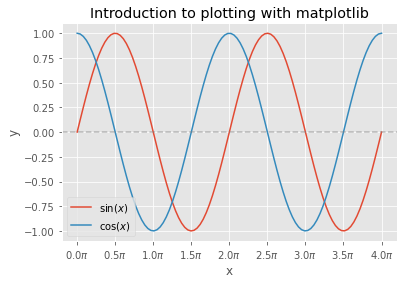

In [27]:
fig, ax = plt.subplots()
ax.plot(x_arr, y_sin, label='$\sin (x)$')
ax.plot(x_arr, y_cos, label='$\cos (x)$')

# create the legend, using the labels defined in the plot() function
ax.legend()

# add axis labels by providing a text string as the first argument
ax.set_xlabel('x')
ax.set_ylabel('y')

# add a title by providing a text string as the first argument
ax.set_title('Introduction to plotting with matplotlib')

# modify tick positions
x_ticks = np.linspace(0, 4*np.pi, 9)
x_ticklabels = [f'{x}$\pi$' for x in x_ticks/np.pi]

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

# add horizontal line at y=0
ax.axhline(0, c='gray', ls='--', alpha=0.5)

## 3.2. Creating a scatter plot

The scatter plot is very common in science and engineering to represent the relationship between two variables. 

### 3.2.1. The basic scatter plot

Everything we learned in the section above is directly applicable to the scatter plot, the key difference is that we use the `axis.scatter()` function in place of plot!

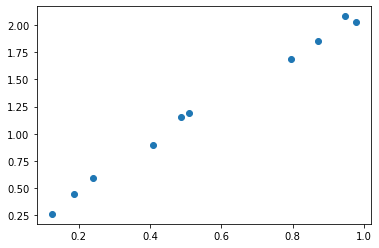

In [13]:
# create 10 (x, y) data points 
x = np.random.random(10)
y = 2*x + (0.2 * np.random.random(10))

# plot the points
fig, ax = plt.subplots()
ax.scatter(x, y)

### 3.2.2. Modifying marker properties

With the scatter plot we modify the properties of the marker, including its shape (`marker`), size (`s`) and color (`c`). 

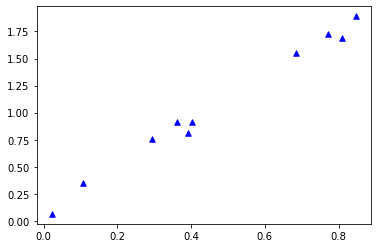

In [14]:
# create 10 (x, y) data points 
x = np.random.random(10)
y = 2*x + (0.2 * np.random.random(10))

# plot the points
fig, ax = plt.subplots()
ax.scatter(x, y, marker='^', s=30, c='blue')

Interestingly, we can also set the size based on a array of values. Here, we create a new variable $z=20\left( x^2 + y^2 \right)$. This is used to set both the marker size.

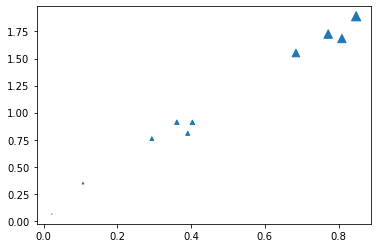

In [15]:
z = 20 * (x**2 + y**2)

# plot the points
fig, ax = plt.subplots()
ax.scatter(x, y, marker='^', s=z)

Sometimes, we'll use multiple calls to the `axis.scatter()` function to highlight certain points in the plot. Here, we use the `ndarray.argsort()` function. This returns a new array of the *index* values of the `z` array that would put the `z` into sorted order.

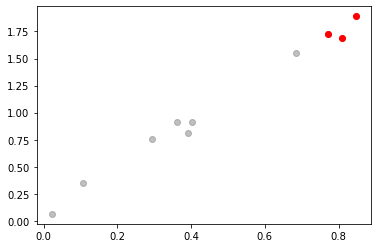

In [16]:
fig, ax = plt.subplots()

# all points are plotted in gray, at 50% opacity
ax.scatter(x, y, color='gray', alpha=0.5)

# the argsort function returns an array of the index values, in sorted order
# we use array slicing to select the last 3 indexes from the sorted array
top3_indices = z.argsort()[-3:]

# the selected top 3 points are plotted in red
ax.scatter(x[top3_indices], y[top3_indices], color='red')

If you want to dig further into how this works, take a look at the code below. This will print out the valus of the `z` array, along with the results of the `ndarray.argsort` function, and the sorted `x`, `y` and `z` arrays.

In [17]:
# display the z-values
print(f'z values: {np.round(z, 2)}')

# display the sort order - the first value is the index of the smallest value in z
print(f'z indices in sorted order: {z.argsort()}')

# display the x, y, z values in sorted order (by z)
df = pd.DataFrame({'x': x[z.argsort()], 'y': y[z.argsort()], 'z': z[z.argsort()]})
print(df)

z values: [69.87 71.49  0.09 19.82 57.47 16.14 85.84  2.66 13.25 19.23]
z indices in sorted order: [2 7 8 5 9 3 4 0 1 6]
          x         y          z
0  0.021895  0.064389   0.092506
1  0.106566  0.348550   2.656864
2  0.293369  0.759382  13.254523
3  0.390773  0.808814  16.137681
4  0.361183  0.911493  19.225450
5  0.403402  0.910055  19.818682
6  0.684336  1.550846  57.468818
7  0.809105  1.684843  69.866919
8  0.771910  1.725897  71.491306
9  0.847730  1.890348  85.841201


### 3.2.3 Modifying the style

Many people choose to use an alternate to the default `matplotlib` color scheme. There are several options built-in to the package that you can easily select by name with the `plt.style.use()` function. Two styles that I particularly like are the `ggplot` style which is patterned after the popular `ggplot` (grammar of graphics) plotting library in the R language, and the `seaborn` style with is patterned after the default style in the Python `seaborn` package that we will introduce in the next unit. Both of these styles have a light gray background, with white major gridlines that both provide a reference for the reader, while not competing for attention with the data that is being shown.

To set the style, just place this line at the top of your code. All subsequent plots, including plots created in other cells, will use the selected style. 

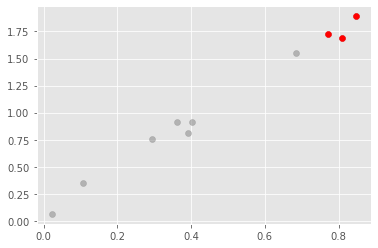

In [18]:
plt.style.use('ggplot')

fig, ax = plt.subplots()

# all points are plotted in gray, at 50% opacity
ax.scatter(x, y, color='gray', alpha=0.5)

# the argsort function returns an array of the index values, in sorted order
# we use array slicing to select the last 3 indexes from the sorted array
top3_indices = z.argsort()[-3:]

# the selected top 3 points are plotted in red
ax.scatter(x[top3_indices], y[top3_indices], color='red')

## 3.3. Creating a bar chart

Bar charts are often used for comparing categorical data. If you think you need a pie chart - try the bar chart instead! It is much easier to compare the lengths of bars than the area/angles of a pie chart.

### 3.3.1. Vertical bar chart

[Text(0, 0, 'a'), Text(1, 0, 'b'), Text(2, 0, 'c'), Text(3, 0, 'd')]

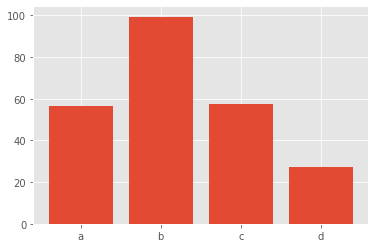

In [19]:
fig, ax = plt.subplots()

categories = ['a', 'b', 'c', 'd']
category_index = np.arange(len(categories))
values = np.random.random(4)*100

ax.bar(category_index, values)
ax.set_xticks(category_index)
ax.set_xticklabels(categories)

### 3.3.2. Horizontal bar chart

If you have long category labels it can be easier to quickly read a horizontal bar chart, since the labels will be oriented for left-to-right reading. The main difference is that, instead of `axis.bar()`, we add an "h" for horizontal and use the function `axis.barh()`. Also, our category labels are now on the y-axis. 

[Text(0, 0, 'a'), Text(0, 1, 'b'), Text(0, 2, 'c'), Text(0, 3, 'd')]

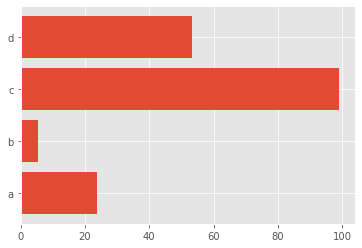

In [20]:
fig, ax = plt.subplots()

categories = ['a', 'b', 'c', 'd']
category_index = np.arange(len(categories))
values = np.random.random(4)*100

ax.barh(category_index, values)
ax.set_yticks(category_index)
ax.set_yticklabels(categories)

## 3.4. Saving your plot

Now that we have demonstrated the ability to create common plots in `matplotlib`, how do we save them for use in a presentation or report? We have the ability using the `plt.savefig()` function to easily save these plots to a file using the png, pdf or svg file formats.

- **png**: A *portable network graphics* (png) file is a bitmap image format that is easily imported into office documents, or used on the web. You will need to set the image size and resolution, in "dots per inch" (dpi), to scale the image to larger or smaller displays. The file size will increase as you increase either of these variables. 
- **pdf**: You are probably familiar with the common pdf format from documents, but this can be used for images as well. A pdf image is stored in a vector format. The technical details are not important, but with a vector format you don't need to worry about an image getting fuzzy as you increase the size. This can be a good choice for publication graphics, but also has compatibility issues with current versions of some office software.
- **svg**: The *standardized vector graphics* (svg) file is an xml-based file format that can be used for web graphics. Image files are stored as plain text, and can be edited in a graphics editor like [Inkscape]().

For most uses, I recommend using the *png* format. If you're going to make large (or high resolution) prints of a graph, choose *pdf*. 

In the example below, we'll save our plot in 3 formats:

- **png**, at 30 dpi
- **png**, at 300 dpi
- **pdf**

The file type is inferred from the filename that you provide as the first argument. The `dpi` parameter is optional. Take a look at (and, optionally, print) the image files and observe the differences between the formats.

You'll notice that I have added another function before saving the files. The function `plt.tight_layout()` will render the plot to fit the plot axes to the file, to eliminate whitespace. Alternatively, you can set the layout to *tight* using the `bbox_inches` (bounding box inches) parameter in the `plt.savefig()` function.

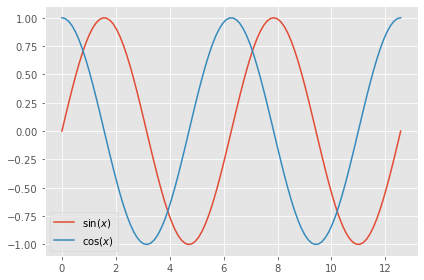

In [21]:
fig, ax = plt.subplots()

ax.plot(x_arr, y_sin, label='$\sin (x)$')
ax.plot(x_arr, y_cos, label='$\cos (x)$')

ax.legend()

plt.tight_layout()

plt.savefig('../../output/unit3_plot_30dpi.png', dpi=30)
plt.savefig('../../output/unit3_plot_300dpi.png', dpi=300)
plt.savefig('../../output/unit3_plot.pdf')
plt.savefig('../../output/unit3_plot_bboxinches.pdf', bbox_inches='tight')

--------------
## Next Steps:

1. Complete the [Unit 3 Problems](./unit03-solutions.ipynb) to test your understanding
2. Advance to [Unit 4](../04-pandas-dataframe/unit04-lesson.ipynb) when you're ready for the next step